In [154]:
# imports
import bz2
import pickle5 as pickle
import matplotlib as mpl
import matplotlib.pyplot as plt
import tensorflow as tf
import seaborn as sns
import numpy as np
import pandas as pd
import datetime

mpl.rcParams['figure.figsize'] = (8, 6)
mpl.rcParams['axes.grid'] = False

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [155]:
# functions
# Load any compressed pickle file
def decompress_pickle(file):
    data = bz2.BZ2File(file, 'rb')
    data = pickle.load(data)
    return data


In [156]:
df = decompress_pickle('6nutrients.pbz2')

In [157]:
df1 = df.copy()
# add a column for value counts by id
df1['id_count'] = df.groupby('id')['id'].transform('count')

df1.head()

,id,date,total.calories,total.carbs,total.fat,total.protein,total.sodium,total.sugar,goal.calories,goal.carbs,goal.fat,goal.protein,goal.sodium,goal.sugar,id_count
0,1,2014-09-14,2924.0,340.0,114.0,186.0,3658.0,109.0,3173.0,396.0,105.0,160.0,2300.0,119.0,174
1,1,2014-09-15,2430.0,96.0,37.0,50.0,855.0,63.0,1572.0,196.0,52.0,79.0,2300.0,59.0,174
2,1,2014-09-16,1862.0,158.0,54.0,114.0,2215.0,100.0,1832.0,229.0,61.0,92.0,2300.0,69.0,174
3,1,2014-09-17,2251.0,187.0,60.0,98.0,1765.0,105.0,1685.0,210.0,56.0,85.0,2300.0,63.0,174
4,1,2014-09-18,2001.0,113.0,81.0,202.0,1101.0,71.0,1597.0,199.0,53.0,80.0,2300.0,60.0,174


In [158]:
id_1 = df1[df1["id"] == 1]
id_1=  id_1[id_1["goal.calories"] < 4578]
id_1.info()
date_time = pd.to_datetime(id_1.pop('date'), format='%Y-%m-%d')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 173 entries, 0 to 173
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              173 non-null    int64  
 1   date            173 non-null    object 
 2   total.calories  173 non-null    float64
 3   total.carbs     173 non-null    float64
 4   total.fat       173 non-null    float64
 5   total.protein   173 non-null    float64
 6   total.sodium    173 non-null    float64
 7   total.sugar     173 non-null    float64
 8   goal.calories   173 non-null    float64
 9   goal.carbs      173 non-null    float64
 10  goal.fat        173 non-null    float64
 11  goal.protein    173 non-null    float64
 12  goal.sodium     173 non-null    float64
 13  goal.sugar      173 non-null    float64
 14  id_count        173 non-null    int64  
dtypes: float64(12), int64(2), object(1)
memory usage: 21.6+ KB


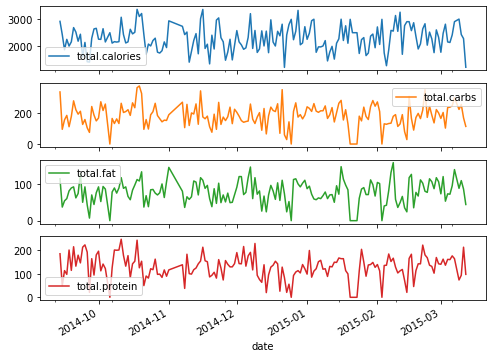

In [159]:
plot_cols = ['total.calories', 'total.carbs','total.fat','total.protein']
plot_features = id_1[plot_cols]
plot_features.index = date_time
_ = plot_features.plot(subplots=True)

In [160]:
id_1.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
id,173.0,1.000000,0.000000,1.0,1.0,1.0,1.0,1.0
total.calories,173.0,2298.427746,475.494482,1203.0,1990.0,2258.0,2584.0,3373.0
total.carbs,173.0,183.820809,74.835535,0.0,142.0,186.0,232.0,379.0
total.fat,173.0,77.260116,31.750233,0.0,59.0,77.0,100.0,158.0
total.protein,173.0,128.554913,52.007196,0.0,99.0,132.0,161.0,248.0
total.sodium,173.0,2050.289017,899.857248,0.0,1538.0,2049.0,2758.0,4267.0
total.sugar,173.0,81.514451,38.544237,0.0,55.0,78.0,110.0,183.0
goal.calories,173.0,2141.658960,492.540949,1200.0,1789.0,2073.0,2441.0,3911.0
goal.carbs,173.0,266.248555,62.076112,146.0,220.0,258.0,304.0,488.0
goal.fat,173.0,71.208092,16.348051,40.0,60.0,69.0,81.0,129.0


<AxesSubplot:xlabel='goal.calories', ylabel='total.calories'>

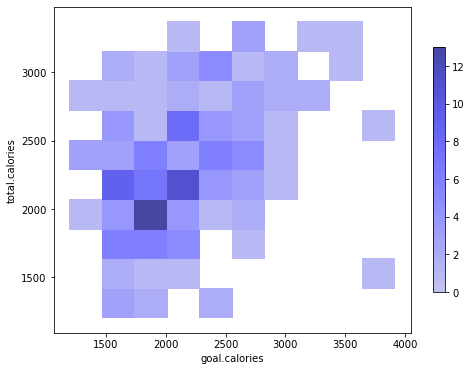

<AxesSubplot:xlabel='goal.carbs', ylabel='total.carbs'>

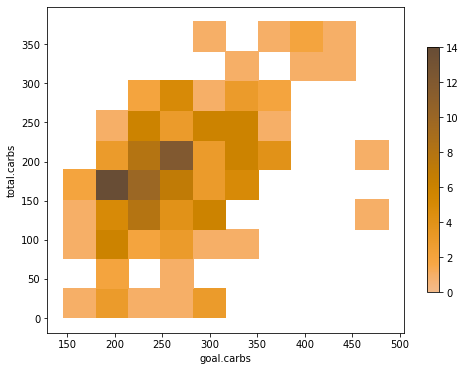

<AxesSubplot:xlabel='goal.fat', ylabel='total.fat'>

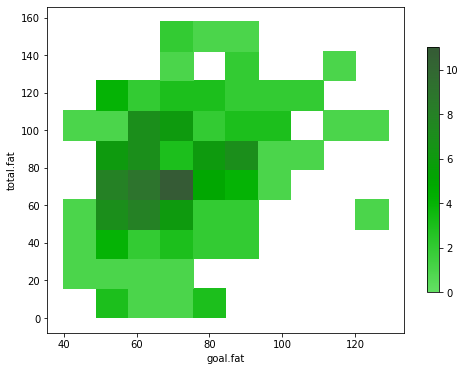

<AxesSubplot:xlabel='goal.protein', ylabel='total.protein'>

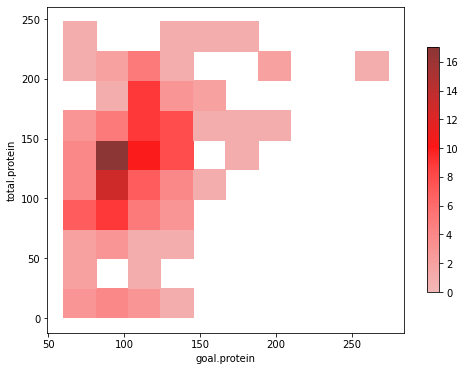

In [161]:
# Observering totals vs. goals
sns.histplot(
    id_1, x="goal.calories", y="total.calories",
    bins=10,
    cbar=True, cbar_kws=dict(shrink=.75),color="blue"
)
plt.savefig('calories.png')
plt.show()
sns.histplot(
    id_1, x="goal.carbs", y="total.carbs",
    bins=10,
    cbar=True, cbar_kws=dict(shrink=.75),color="orange"
)
plt.savefig('carbs.png')
plt.show()
sns.histplot(
    id_1, x="goal.fat", y="total.fat",
    bins=10,
    cbar=True, cbar_kws=dict(shrink=.75),color="green"
)
plt.savefig('fat.png')
plt.show()
sns.histplot(
    id_1, x="goal.protein", y="total.protein",
    bins=10,
    cbar=True, cbar_kws=dict(shrink=.75),color="red"
)
plt.savefig('protein.png')
plt.show()

Text(0.5, 0, 'Time [h]')

Text(0.5, 1.0, 'Time of day signal')

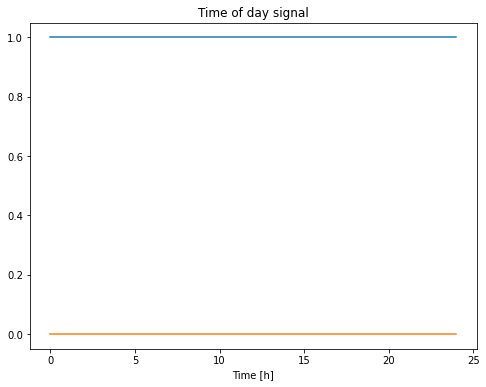

In [162]:
timestamp_s = date_time.map(datetime.datetime.timestamp)
day = 24*60*60
year = (365.2425)*day

id_1['Day sin'] = np.sin(timestamp_s * (2 * np.pi / day))
id_1['Day cos'] = np.cos(timestamp_s * (2 * np.pi / day))
id_1['Year sin'] = np.sin(timestamp_s * (2 * np.pi / year))
id_1['Year cos'] = np.cos(timestamp_s * (2 * np.pi / year))

plt.plot(np.array(id_1['Day sin'])[:25])
plt.plot(np.array(id_1['Day cos'])[:25])
plt.xlabel('Time [h]')
plt.title('Time of day signal')

(0.0, 5000.0)

(0.1, 5444.79572376911)

([<matplotlib.axis.XTick at 0x7b11318b5460>,
 [Text(1.0, 0, '1/Year'), Text(365.2524, 0, '1/day')])

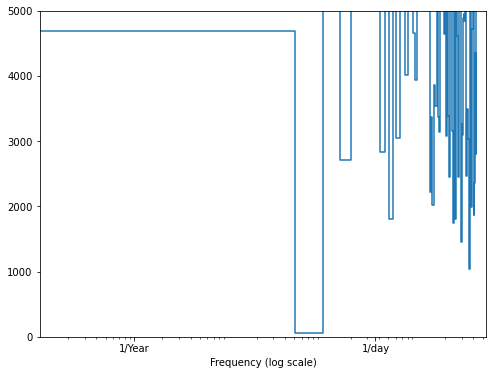

In [163]:
fft = tf.signal.rfft(id_1['total.calories'])
f_per_dataset = np.arange(0, len(fft))

n_samples_h = len(id_1['total.calories'])
hours_per_year = 24*365.2524
years_per_dataset = n_samples_h/hours_per_year

f_per_year = f_per_dataset/years_per_dataset
plt.step(f_per_year, np.abs(fft))
plt.xscale('log')
plt.ylim(0, 5000)
plt.xlim([0.1, max(plt.xlim())])
plt.xticks([1, 365.2524], labels=['1/Year', '1/day'])
_ = plt.xlabel('Frequency (log scale)')

In [164]:
column_indices = {name: i for i, name in enumerate(id_1.columns)}

n = len(id_1)
train_df = id_1[0:int(n*0.7)]
val_df = id_1[int(n*0.7):int(n*0.9)]
test_df = id_1[int(n*0.9):]

num_features = id_1.shape[1]

In [165]:
train_mean = train_df.mean()
train_std = train_df.std()

train_df = (train_df - train_mean) / train_std
val_df = (val_df - train_mean) / train_std
test_df = (test_df - train_mean) / train_std

<Figure size 864x432 with 0 Axes>

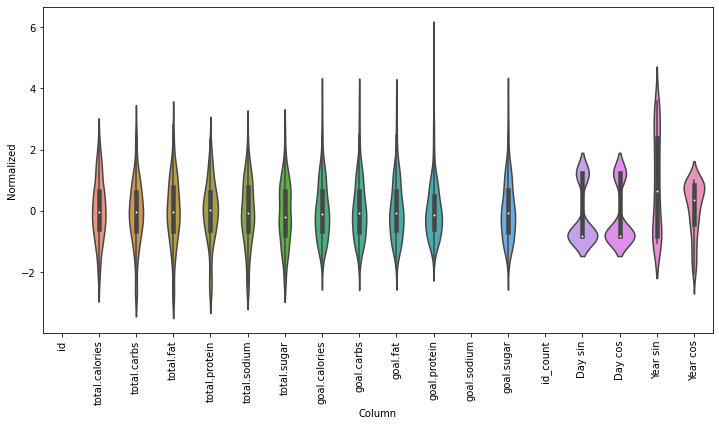

In [166]:
df_std = (id_1 - train_mean) / train_std
df_std = df_std.melt(var_name='Column', value_name='Normalized')
plt.figure(figsize=(12, 6))
ax = sns.violinplot(x='Column', y='Normalized', data=df_std)
_ = ax.set_xticklabels(id_1.keys(), rotation=90)

In [167]:
class WindowGenerator():
  def __init__(self, input_width, label_width, shift,
               train_df=train_df, val_df=val_df, test_df=test_df,
               label_columns=None):
    # Store the raw data.
    self.train_df = train_df
    self.val_df = val_df
    self.test_df = test_df

    # Work out the label column indices.
    self.label_columns = label_columns
    if label_columns is not None:
      self.label_columns_indices = {name: i for i, name in
                                    enumerate(label_columns)}
    self.column_indices = {name: i for i, name in
                           enumerate(train_df.columns)}

    # Work out the window parameters.
    self.input_width = input_width
    self.label_width = label_width
    self.shift = shift

    self.total_window_size = input_width + shift

    self.input_slice = slice(0, input_width)
    self.input_indices = np.arange(self.total_window_size)[self.input_slice]

    self.label_start = self.total_window_size - self.label_width
    self.labels_slice = slice(self.label_start, None)
    self.label_indices = np.arange(self.total_window_size)[self.labels_slice]

  def __repr__(self):
    return '\n'.join([
        f'Total window size: {self.total_window_size}',
        f'Input indices: {self.input_indices}',
        f'Label indices: {self.label_indices}',
        f'Label column name(s): {self.label_columns}'])

def split_window(self, features):
  inputs = features[:, self.input_slice, :]
  labels = features[:, self.labels_slice, :]
  if self.label_columns is not None:
    labels = tf.stack(
        [labels[:, :, self.column_indices[name]] for name in self.label_columns],
        axis=-1)

  # Slicing doesn't preserve static shape information, so set the shapes
  # manually. This way the `tf.data.Datasets` are easier to inspect.
  inputs.set_shape([None, self.input_width, None])
  labels.set_shape([None, self.label_width, None])

  return inputs, labels

WindowGenerator.split_window = split_window

In [168]:
# given 30 days of input, predict the next 30 days
w1 = WindowGenerator(input_width=30, label_width=1, shift=30, label_columns=['total.calories'])
w1

w2 = WindowGenerator(input_width=6, label_width=1, shift=1,
                     label_columns=['total.calories'])
w2

Total window size: 60
Input indices: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29]
Label indices: [59]
Label column name(s): ['total.calories']

Total window size: 7
Input indices: [0 1 2 3 4 5]
Label indices: [6]
Label column name(s): ['total.calories']

In [175]:
example_window = tf.stack([np.array(train_df[:w2.total_window_size]),
                           np.array(train_df[30:30+w2.total_window_size]),
                           np.array(train_df[60:60+w2.total_window_size])])


example_inputs, example_labels = w2.split_window(example_window)

print('All shapes are: (batch, time, features)')
print(f'Window shape: {example_window.shape}')
print(f'Inputs shape: {example_inputs.shape}')
print(f'labels shape: {example_labels.shape}')

All shapes are: (batch, time, features)
Window shape: (3, 7, 18)
Inputs shape: (3, 6, 18)
labels shape: (3, 1, 1)
